In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
from google.colab import drive

In [17]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
data=pd.read_csv("/content/drive/MyDrive/train_sub.csv")

##1. train.csv / test.csv
user_id:	사용자의 고유 식별자

subscription_duration:	사용자가 서비스에 가입한 기간 (월)

recent_login_time:	사용자가 마지막으로 로그인한 시간 (일)

average_login_time: 	사용자의 일반적인 로그인 시간

average_time_per_learning_session:	각 학습 세션에 소요된 평균 시간 (분)

monthly_active_learning_days:	월간 활동적인 학습 일수

total_completed_courses:	완료한 총 코스 수

recent_learning_achievement: 	최근 학습 성취도

abandoned_learning_sessions:	중단된 학습 세션 수

community_engagement_level:	커뮤니티 참여도

preferred_difficulty_level:	선호하는 난이도

subscription_type:	구독 유형

customer_inquiry_history:	고객 문의 이력

payment_pattern
  사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
  - 7: 3개월 모두 결제함
  - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
  - 5: 첫 달과 마지막 달에 결제함
  - 4: 첫 달에만 결제함
  - 3: 마지막 2개월에 결제함
  - 2: 가운데 달에만 결제함
  - 1: 마지막 달에만 결제함
  - 0: 3개월 동안 결제하지 않음
target:	사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

##데이터 불러오기

In [19]:
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [20]:
data.isna().sum()# 결측치가 없음을 확인

user_id                              0
subscription_duration                0
recent_login_time                    0
average_login_time                   0
average_time_per_learning_session    0
monthly_active_learning_days         0
total_completed_courses              0
recent_learning_achievement          0
abandoned_learning_sessions          0
community_engagement_level           0
preferred_difficulty_level           0
subscription_type                    0
customer_inquiry_history             0
payment_pattern                      0
target                               0
dtype: int64

In [21]:
data.describe()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


In [22]:
set(data["abandoned_learning_sessions"].unique())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [23]:
data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

##데이터 EDA 및 전처리

In [26]:
data.columns

Index(['user_id', 'subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'preferred_difficulty_level',
       'subscription_type', 'customer_inquiry_history', 'payment_pattern',
       'target'],
      dtype='object')

In [27]:
data.corr()

<ipython-input-27-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
subscription_duration,1.000000,0.014754,-0.000031,0.006324,0.002193,-0.001662,0.007875,0.014414,0.002114,-0.005174,-0.003704,-0.006710
recent_login_time,0.014754,1.000000,-0.006113,-0.004650,-0.015338,-0.000142,0.005768,-0.015882,-0.005486,0.011653,0.008737,-0.004184
average_login_time,-0.000031,-0.006113,1.000000,-0.007382,0.002294,-0.012416,-0.005967,0.013661,0.003129,0.009768,0.012508,-0.008527
average_time_per_learning_session,0.006324,-0.004650,-0.007382,1.000000,-0.001678,0.081332,-0.008231,-0.014488,0.086485,-0.001397,-0.002460,0.118261
monthly_active_learning_days,0.002193,-0.015338,0.002294,-0.001678,1.000000,0.004816,0.030110,-0.007512,0.000700,-0.016704,-0.003457,0.004876
total_completed_courses,-0.001662,-0.000142,-0.012416,0.081332,0.004816,1.000000,-0.002416,0.012322,0.266026,-0.014949,-0.013646,-0.004040
recent_learning_achievement,0.007875,0.005768,-0.005967,-0.008231,0.030110,-0.002416,1.000000,0.002115,-0.000810,0.005612,-0.003968,0.002294
abandoned_learning_sessions,0.014414,-0.015882,0.013661,-0.014488,-0.007512,0.012322,0.002115,1.000000,0.015877,-0.007322,0.010299,-0.019636
community_engagement_level,0.002114,-0.005486,0.003129,0.086485,0.000700,0.266026,-0.000810,0.015877,1.000000,0.005574,-0.015914,0.009641
customer_inquiry_history,-0.005174,0.011653,0.009768,-0.001397,-0.016704,-0.014949,0.005612,-0.007322,0.005574,1.000000,0.000128,0.000277


In [28]:
sns.pairplot(data,plot_kws={"alpha":0.2})#투명도를 조정해서 산점도 분포를 파악한다.

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='average_time_per_learning_session', ylabel='Count'>

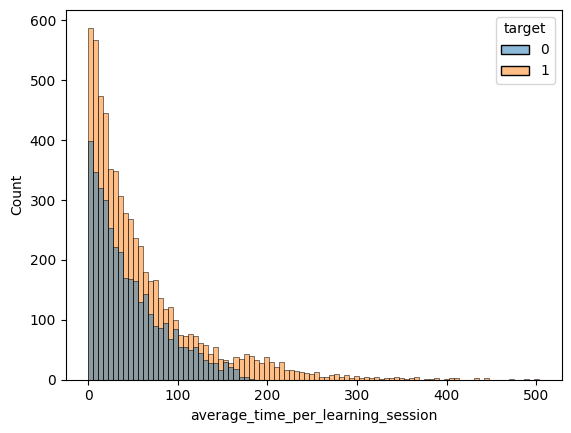

In [29]:
sns.histplot(x="average_time_per_learning_session", data=data,hue="target")
#꼬리가 오른쪽으로 긴 분포를 보여주므로 "average_time_per_learning_session"은 후에 feature engineering 때 로그변환을 고려한다.

In [30]:
# data["average_time_per_learning_session_bin"]=pd.cut(data["average_time_per_learning_session"],5)
# data["average_time_per_learning_session_bin"]=pd.qcut(data["average_time_per_learning_session"],5)
#이상값이 너무 많아 연속형변수를 구간별로 잘라 범주형으로 만드는걸 고려했지만 성능도 오히려 떨어졌고, 로그변환을 통해 어느정도 해결되었다.
# data["average_time_per_learning_session_bin"] = data["average_time_per_learning_session_bin"].astype('category').cat.codes
# data=data.drop("average_time_per_learning_session",axis=1)

In [31]:
#두 범주형 변수간의 상관성을 보기위해서는 카이제곱검정을 하면 된다.

<Axes: xlabel='monthly_active_learning_days', ylabel='Count'>

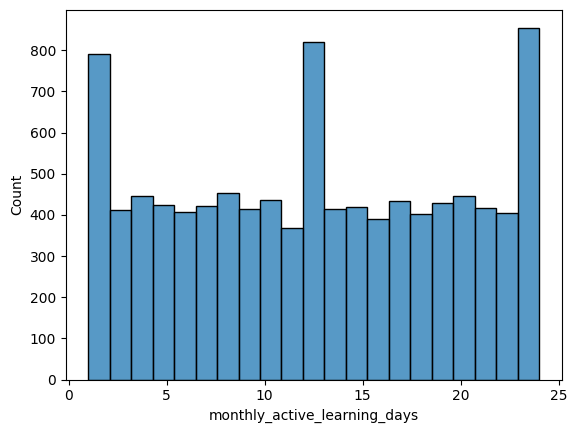

In [32]:
sns.histplot(x="monthly_active_learning_days",data=data)

In [33]:
data.columns

Index(['user_id', 'subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'preferred_difficulty_level',
       'subscription_type', 'customer_inquiry_history', 'payment_pattern',
       'target'],
      dtype='object')

<Axes: xlabel='target', ylabel='count'>

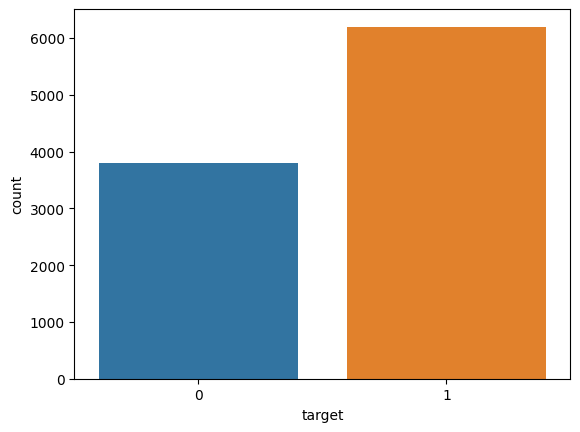

In [34]:
sns.countplot(x='target',  data = data)

<Axes: xlabel='subscription_type', ylabel='count'>

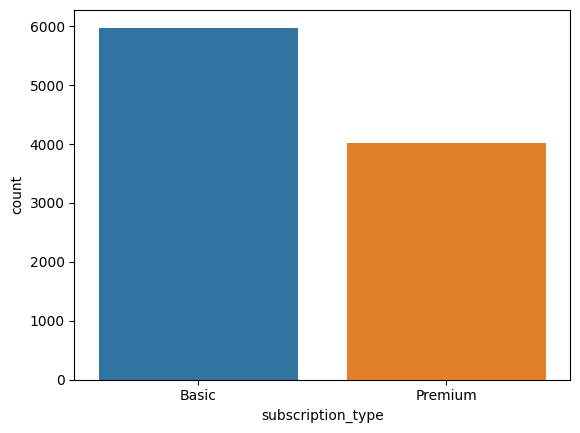

In [35]:
sns.countplot(x='subscription_type',  data = data)

<Axes: xlabel='preferred_difficulty_level', ylabel='count'>

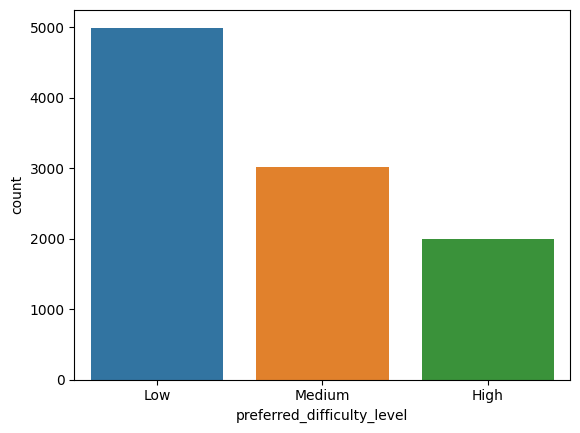

In [36]:
sns.countplot(x='preferred_difficulty_level',  data = data)

<Axes: xlabel='community_engagement_level', ylabel='count'>

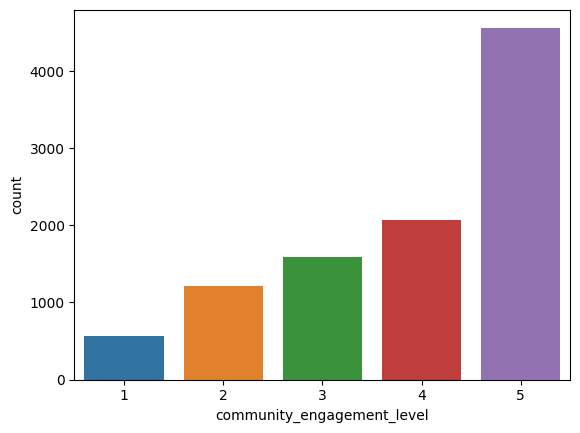

In [37]:
sns.countplot(x='community_engagement_level',  data = data)

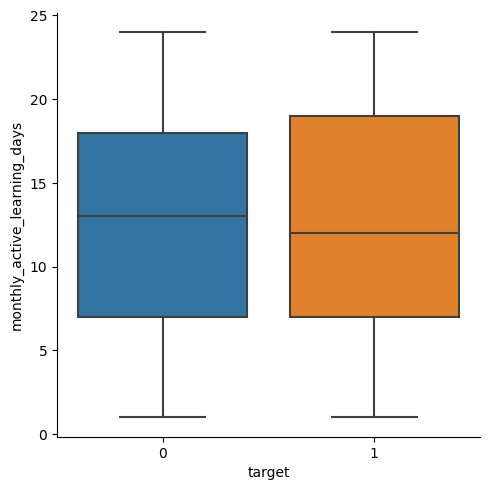

In [38]:
sns.catplot(data=data,x='target',y="monthly_active_learning_days",kind="box")

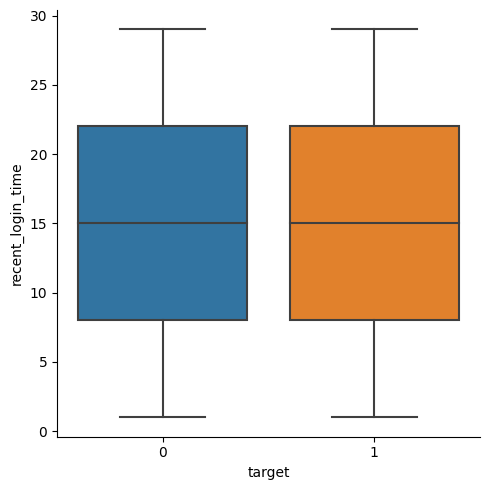

In [39]:
sns.catplot(data=data,x='target',y="recent_login_time",kind="box")

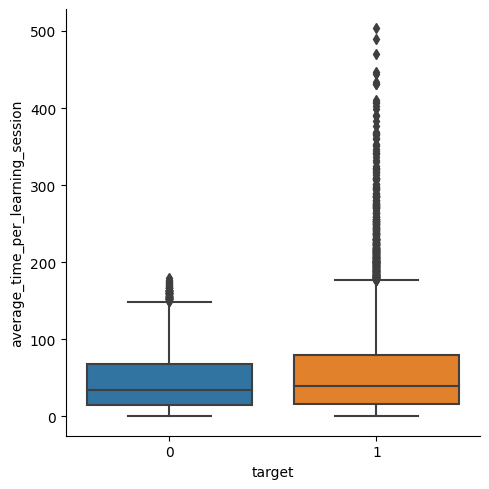

In [40]:
sns.catplot(data=data,x='target',y="average_time_per_learning_session",kind="box")

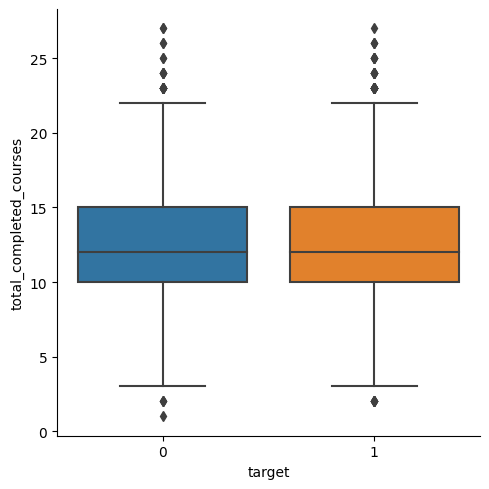

In [41]:
sns.catplot(data=data,x='target',y="total_completed_courses",kind="box")

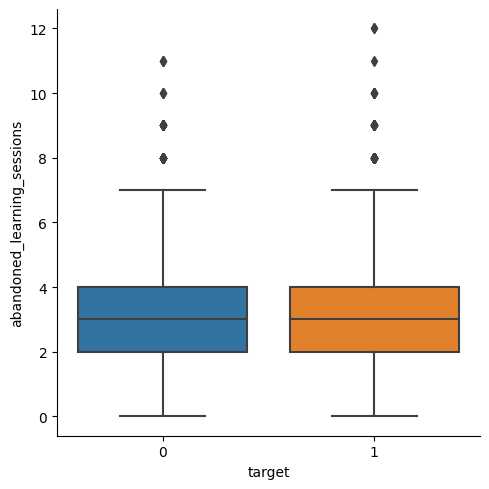

In [42]:
sns.catplot(data=data,x="target",y="abandoned_learning_sessions",kind="box")

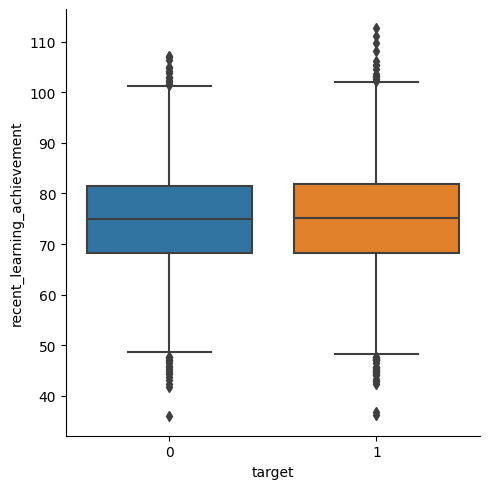

In [43]:
sns.catplot(data=data,x="target",y="recent_learning_achievement",kind="box")

In [47]:
data.corr()

<ipython-input-47-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
subscription_duration,1.000000,0.014754,-0.000031,0.000049,0.002193,-0.001662,0.007875,0.014414,0.002114,-0.005174,-0.003704,-0.006710
recent_login_time,0.014754,1.000000,-0.006113,-0.005141,-0.015338,-0.000142,0.005768,-0.015882,-0.005486,0.011653,0.008737,-0.004184
average_login_time,-0.000031,-0.006113,1.000000,-0.009113,0.002294,-0.012416,-0.005967,0.013661,0.003129,0.009768,0.012508,-0.008527
average_time_per_learning_session,0.000049,-0.005141,-0.009113,1.000000,0.005215,0.072871,-0.004418,-0.017850,0.072337,-0.005135,0.000993,0.061911
monthly_active_learning_days,0.002193,-0.015338,0.002294,0.005215,1.000000,0.004816,0.030110,-0.007512,0.000700,-0.016704,-0.003457,0.004876
total_completed_courses,-0.001662,-0.000142,-0.012416,0.072871,0.004816,1.000000,-0.002416,0.012322,0.266026,-0.014949,-0.013646,-0.004040
recent_learning_achievement,0.007875,0.005768,-0.005967,-0.004418,0.030110,-0.002416,1.000000,0.002115,-0.000810,0.005612,-0.003968,0.002294
abandoned_learning_sessions,0.014414,-0.015882,0.013661,-0.017850,-0.007512,0.012322,0.002115,1.000000,0.015877,-0.007322,0.010299,-0.019636
community_engagement_level,0.002114,-0.005486,0.003129,0.072337,0.000700,0.266026,-0.000810,0.015877,1.000000,0.005574,-0.015914,0.009641
customer_inquiry_history,-0.005174,0.011653,0.009768,-0.005135,-0.016704,-0.014949,0.005612,-0.007322,0.005574,1.000000,0.000128,0.000277


## 데이터 전처리 - 표준화 및 인코딩

In [44]:
data['average_time_per_learning_session']=np.log1p(data['average_time_per_learning_session'])#위에서 언급한대로 분포모양 이상으로 로그변환을 해준다.

In [45]:
data_cat=data[["subscription_type",'preferred_difficulty_level',"payment_pattern",'community_engagement_level']]
data_con= data[[ 'subscription_duration', 'recent_login_time',
       'average_login_time','recent_learning_achievement',
       'monthly_active_learning_days', 'total_completed_courses',
        'abandoned_learning_sessions','average_time_per_learning_session'
        ]]# 상관계수가 0.0002대인 'customer_inquiry_history'를 모델 예측변수에서 제외시킴
y=data['target']

In [46]:
sns.pairplot(pd.concat([data_con, y],axis=1),plot_kws={"alpha":0.2})

Output hidden; open in https://colab.research.google.com to view.

In [48]:
from sklearn.preprocessing import MinMaxScaler#StandardScaler

In [49]:
scaler=MinMaxScaler()#standard scaler도 써봤지만 minmaxscaler가 성능이 조금 더 좋았다.

In [50]:
scaled_data_con=scaler.fit_transform(data_con[['subscription_duration', 'recent_login_time',
       'average_login_time','recent_learning_achievement',
       'monthly_active_learning_days', 'total_completed_courses',
       'abandoned_learning_sessions']])#'average_time_per_learning_session'는 로그변환을 진행했다.

In [51]:
data_con.columns

Index(['subscription_duration', 'recent_login_time', 'average_login_time',
       'recent_learning_achievement', 'monthly_active_learning_days',
       'total_completed_courses', 'abandoned_learning_sessions',
       'average_time_per_learning_session'],
      dtype='object')

In [52]:
scaled_data_con=pd.DataFrame(scaled_data_con, columns=[
     'subscription_duration', 'recent_login_time',
       'average_login_time','recent_learning_achievement',
       'monthly_active_learning_days', 'total_completed_courses',
       'abandoned_learning_sessions'
       ])#'customer_inquiry_history'1차 # 'recent_login_time'2차# "average_login_time""recent_learning_achievement" 3차

In [53]:
scaled_data_con

,subscription_duration,recent_login_time,average_login_time,recent_learning_achievement,monthly_active_learning_days,total_completed_courses,abandoned_learning_sessions
0,0.545455,0.464286,0.510710,0.422657,0.739130,0.576923,0.250000
1,0.681818,0.607143,0.653087,0.803441,0.652174,0.461538,0.166667
2,0.954545,0.000000,0.561419,0.761609,0.521739,0.500000,0.250000
3,0.000000,0.642857,0.619612,0.446031,0.782609,0.653846,0.000000
4,0.136364,0.142857,0.772338,0.599412,0.782609,0.346154,0.166667
...,...,...,...,...,...,...,...
9995,0.954545,1.000000,0.501838,0.378413,0.739130,0.576923,0.166667
9996,0.409091,0.357143,0.690470,0.610264,0.347826,0.269231,0.250000
9997,0.272727,0.928571,0.644470,0.594848,1.000000,0.500000,0.250000
9998,0.454545,0.214286,0.666507,0.703291,0.391304,0.346154,0.333333


범주형

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
data_cat.columns

Index(['subscription_type', 'preferred_difficulty_level', 'payment_pattern',
       'community_engagement_level'],
      dtype='object')

In [56]:
encoding = OneHotEncoder(sparse=False,drop='first')
data_cat_dummy = encoding.fit_transform(data_cat[['subscription_type', 'preferred_difficulty_level', 'payment_pattern',
       'community_engagement_level']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [57]:
len(data_cat_dummy[0])

14

In [58]:
data_cat

,subscription_type,preferred_difficulty_level,payment_pattern,community_engagement_level
0,Basic,Low,5,4
1,Basic,Medium,6,3
2,Premium,Medium,7,4
3,Basic,Low,0,3
4,Basic,Medium,0,4
...,...,...,...,...
9995,Premium,Low,1,5
9996,Basic,Medium,7,3
9997,Basic,High,6,5
9998,Basic,Low,0,5


In [59]:
encoding.categories_

[array(['Basic', 'Premium'], dtype=object),
 array(['High', 'Low', 'Medium'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([1, 2, 3, 4, 5])]

In [60]:
data_cat_dummy

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [61]:
data_cat_dummy=pd.DataFrame(data_cat_dummy,columns=["subscription_type_1","preferred_difficulty_level_1",\
                                    "preferred_difficulty_level_2","payment_pattern_1","payment_pattern_2",\
                                     "payment_pattern_3","payment_pattern_4","payment_pattern_5","payment_pattern_6","payment_pattern_7"\
                                     ,"community_engagement_level_2","community_engagement_level_3","community_engagement_level_4","community_engagement_level_5",\

                                                  ])
  #  "average_time_per_learning_session_bin_1", "average_time_per_learning_session_bin_2",
  #                                                   "average_time_per_learning_session_bin_3", "average_time_per_learning_session_bin_4", "average_time_per_learning_session_bin_5"

In [62]:
data_cat.columns

Index(['subscription_type', 'preferred_difficulty_level', 'payment_pattern',
       'community_engagement_level'],
      dtype='object')

In [63]:
data_cat_dummy

,subscription_type_1,preferred_difficulty_level_1,preferred_difficulty_level_2,payment_pattern_1,payment_pattern_2,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7,community_engagement_level_2,community_engagement_level_3,community_engagement_level_4,community_engagement_level_5
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [64]:
x=pd.concat([scaled_data_con, data_cat_dummy,data[['average_time_per_learning_session']]],axis=1)

In [65]:
x

,subscription_duration,recent_login_time,average_login_time,recent_learning_achievement,monthly_active_learning_days,total_completed_courses,abandoned_learning_sessions,subscription_type_1,preferred_difficulty_level_1,preferred_difficulty_level_2,...,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7,community_engagement_level_2,community_engagement_level_3,community_engagement_level_4,community_engagement_level_5,average_time_per_learning_session
0,0.545455,0.464286,0.510710,0.422657,0.739130,0.576923,0.250000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.243598
1,0.681818,0.607143,0.653087,0.803441,0.652174,0.461538,0.166667,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.299271
2,0.954545,0.000000,0.561419,0.761609,0.521739,0.500000,0.250000,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.125641
3,0.000000,0.642857,0.619612,0.446031,0.782609,0.653846,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.776411
4,0.136364,0.142857,0.772338,0.599412,0.782609,0.346154,0.166667,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.457713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.954545,1.000000,0.501838,0.378413,0.739130,0.576923,0.166667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.443281
9996,0.409091,0.357143,0.690470,0.610264,0.347826,0.269231,0.250000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.838696
9997,0.272727,0.928571,0.644470,0.594848,1.000000,0.500000,0.250000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.854390
9998,0.454545,0.214286,0.666507,0.703291,0.391304,0.346154,0.333333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.840110


##VIF 지수

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:

vif = pd.DataFrame()


vif["VIF Factor"] = [variance_inflation_factor(data_con.values, i) for i in range(data_con.shape[1])]
vif["features"] = data_con.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

,VIF Factor,features
0,29.455256,recent_learning_achievement
1,20.107112,average_login_time
2,11.289327,total_completed_courses
3,9.704843,average_time_per_learning_session
4,4.188108,monthly_active_learning_days
5,4.144888,subscription_duration
6,4.104389,recent_login_time
7,3.914347,abandoned_learning_sessions


##데이터 전처리 - PCA

In [68]:
asasa=scaler.fit_transform(data_cat_dummy)

In [69]:
data_cat_dummy.columns

Index(['subscription_type_1', 'preferred_difficulty_level_1',
       'preferred_difficulty_level_2', 'payment_pattern_1',
       'payment_pattern_2', 'payment_pattern_3', 'payment_pattern_4',
       'payment_pattern_5', 'payment_pattern_6', 'payment_pattern_7',
       'community_engagement_level_2', 'community_engagement_level_3',
       'community_engagement_level_4', 'community_engagement_level_5'],
      dtype='object')

In [70]:
asasa=pd.DataFrame(asasa,columns=['subscription_type_Premium', 'preferred_difficulty_level_Low',
       'preferred_difficulty_level_Medium', 'payment_pattern_1',
       'payment_pattern_2', 'payment_pattern_3', 'payment_pattern_4',
       'payment_pattern_5', 'payment_pattern_6', 'payment_pattern_7',
       'community_engagement_level_2', 'community_engagement_level_3',
       'community_engagement_level_4', 'community_engagement_level_5'])

In [71]:
x1=pd.concat([scaled_data_con,asasa],axis=1)

In [72]:
x1

,subscription_duration,recent_login_time,average_login_time,recent_learning_achievement,monthly_active_learning_days,total_completed_courses,abandoned_learning_sessions,subscription_type_Premium,preferred_difficulty_level_Low,preferred_difficulty_level_Medium,...,payment_pattern_2,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7,community_engagement_level_2,community_engagement_level_3,community_engagement_level_4,community_engagement_level_5
0,0.545455,0.464286,0.510710,0.422657,0.739130,0.576923,0.250000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.681818,0.607143,0.653087,0.803441,0.652174,0.461538,0.166667,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.954545,0.000000,0.561419,0.761609,0.521739,0.500000,0.250000,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000000,0.642857,0.619612,0.446031,0.782609,0.653846,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.136364,0.142857,0.772338,0.599412,0.782609,0.346154,0.166667,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.954545,1.000000,0.501838,0.378413,0.739130,0.576923,0.166667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9996,0.409091,0.357143,0.690470,0.610264,0.347826,0.269231,0.250000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9997,0.272727,0.928571,0.644470,0.594848,1.000000,0.500000,0.250000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,0.454545,0.214286,0.666507,0.703291,0.391304,0.346154,0.333333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [79]:
from sklearn.decomposition import PCA

# 차원 축소, target 정보는 제외
pca = PCA(n_components = 13)
pca.fit(x1)

# pca transform 후 데이터프레임으로 자료형 변경
df_pca = pca.transform(x1)
df_pca = pd.DataFrame(df_pca, columns = [0,1,2,3,4,5,6,7,8,9,10,11,12])

df_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.064697,-0.910010,0.606675,-0.323191,-0.095704,0.071540,-0.418609,-0.722672,-0.375885,-0.137535,-0.234034,-0.176523,0.162625
1,1.086609,0.176236,-0.406923,0.533193,-0.138835,0.639370,0.692659,-0.088130,-0.126195,-0.140420,-0.205444,-0.047994,0.277058
2,0.735774,0.571014,1.011015,-0.186323,0.746134,-0.448411,0.283763,-0.018778,-0.062864,-0.052549,0.123176,-0.149098,0.313882
3,0.082316,-0.786029,-0.243064,0.820945,0.007010,0.056985,0.051580,-0.104687,0.018125,-0.098391,-0.197812,-0.348553,-0.218584
4,1.060454,0.055757,0.471830,-0.522284,-0.074600,-0.056723,0.025521,-0.051474,0.078421,-0.003454,-0.349252,-0.523182,-0.213513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.013489,0.235055,0.130687,0.191250,-0.602219,-0.576337,0.231321,0.101439,-0.159237,0.009604,0.150955,0.278241,0.585205
9996,1.104847,0.163730,-0.407260,0.574004,0.741714,-0.413210,0.344432,-0.115525,-0.052143,-0.120869,-0.274718,-0.046986,-0.153510
9997,-0.123599,0.211394,-0.498663,-0.398671,-0.148471,0.618334,0.672893,-0.043951,-0.131737,-0.048069,-0.300644,-0.169008,0.096658
9998,-0.662957,-0.290236,-0.427552,-0.215526,-0.030480,-0.021238,0.020188,-0.049109,0.037027,0.006607,-0.325464,-0.096483,-0.160133


In [81]:
# PCA 주성분 설명력 출력

sum(pca.explained_variance_ratio_)


0.8939561829167093

In [ ]:
#성능을 올려보기 위해 PCA를 통해 차원을 줄여 모델을 만들어봤지만 성능이 오히려 떨어졌다.

## train data, valid data 구분하기

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8)

In [84]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression


# 모델링하기

In [87]:
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

##파라미터 튜닝- gridsearch(성능 향상을 위해)

In [88]:
from sklearn.model_selection import GridSearchCV
# XGB#random_state=20,n_estimators=100, max_depth=12
param_xgb = {"max_depth": [5,10,20,30],
              "min_child_weight" : [1,3,6,10],
              "n_estimators": [100,200,300,500,1000]
              }
# LGB learning_rate=0.2, num_leaves=70,random_state=20
param_lgb = {"learning_rate" : [0.1,0.2,0.3,0.4],
             "max_depth" : [25, 50, 75],
             "num_leaves" : [20,50,60,70,100],
             "n_estimators" : [50,100, 200, 300],

              }
# GBM
param_gbm = {"max_depth" : [4,5,6,7,8,9],
             "learning_rate" : [0.2,0.3,0.4,0.5],
             "n_estimators" : [200,300,400,500]
              }
# CAT
# param_cat = {"depth" : [6,4,5,7,8,9,10],
#           "iterations" : [250,100,500,1000],
#           "learning_rate" : [0.001,0.01,0.1,0.2,0.3],
#           "l2_leaf_reg" : [2,5,10,20,30],
#           "border_count" : [254]
#           }

# Logistic
param_lreg = { 'C' : [1.0, 3, 5, 7, 10],
              'max_iter': [50, 200, 100, 300, 500,700, 800]
              }

# ridge
param_ridge = { 'alpha' : [0.6,0.7,0.8,1.0, 2.0, 3.0],

              }

#ada
param_ada = {
             "learning_rate" : [0.6,0.7,0.8,0.9,1,2],
             "n_estimators" : [50,70,100,200,300]
              }

param_rf = { 'n_estimators' : [50, 100,200],
           'max_depth' : [6, 8, 10, 12],
            }

In [117]:
model_xgb=xgb.XGBClassifier()
model_lightgbm=lgb.LGBMClassifier()
model_grdb=GradientBoostingClassifier()
model_ada=AdaBoostClassifier()
model_rg=RidgeClassifier()
model_rf=RandomForestClassifier()

In [90]:
gscv_xgb = GridSearchCV (estimator = model_xgb, param_grid = param_xgb, scoring ='f1_macro', cv = 3, refit=True, n_jobs=-1, verbose=3)
gscv_lgb = GridSearchCV (estimator = model_lightgbm, param_grid = param_lgb, scoring ='f1_macro', cv = 3, refit=True, n_jobs=-1, verbose=3)
gscv_gbm = GridSearchCV (estimator = model_grdb, param_grid = param_gbm, scoring ='f1_macro', cv = 3, refit=True, n_jobs=-1, verbose=3)
gscv_ada = GridSearchCV (estimator = model_ada, param_grid = param_ada, scoring ='f1_macro', cv = 3, refit=True, n_jobs=-1, verbose=3)
gscv_ridge = GridSearchCV (estimator =model_rg, param_grid = param_ridge, scoring ='f1_macro', cv = 3, refit=True, n_jobs=-1, verbose=3)
gscv_rf = GridSearchCV (estimator =model_rf, param_grid = param_rf, scoring ='f1_macro', cv = 3, refit=True, n_jobs=-1, verbose=3)
gscv_xgb.fit(x_train, y_train)
gscv_lgb.fit(x_train, y_train)
gscv_gbm.fit(x_train, y_train)
gscv_ada.fit(x_train, y_train)
gscv_ridge.fit(x_train, y_train)
gscv_rf.fit(x_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
[LightGBM] [Info] Number of positive: 4945, number of negative: 3055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618125 -> initscore=0.481597
[LightGBM] [Info] Start training from score 0.481597
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Fitting 3 folds for each of 30 candidates, totalling 90 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=3)

In [92]:
print("="*30)
print('XGB 파라미터: ', gscv_xgb.best_params_)
print('XGB 예측 정확도: {:.4f}'.format(gscv_xgb.best_score_))
print("="*30)
print('LGB 파라미터: ', gscv_lgb.best_params_)
print('LGB 예측 정확도: {:.4f}'.format(gscv_lgb.best_score_))
print("="*30)
print('GBM 파라미터: ', gscv_gbm.best_params_)
print('GBM 예측 정확도: {:.4f}'.format(gscv_gbm.best_score_))
print("="*30)
print('ada 파라미터: ', gscv_ada.best_params_)
print('ada 예측 정확도: {:.4f}'.format(gscv_ada.best_score_))
print("="*30)
print('ridge 파라미터: ', gscv_ridge.best_params_)
print('ridge 예측 정확도: {:.4f}'.format(gscv_ridge.best_score_))
print("="*30)
print('rf 파라미터: ', gscv_rf.best_params_)
print('rf 예측 정확도: {:.4f}'.format(gscv_rf.best_score_))
print("="*30)

XGB 파라미터:  {'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 1000}
XGB 예측 정확도: 0.5120
LGB 파라미터:  {'learning_rate': 0.4, 'max_depth': 25, 'n_estimators': 100, 'num_leaves': 50}
LGB 예측 정확도: 0.5240
GBM 파라미터:  {'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 300}
GBM 예측 정확도: 0.5138
ada 파라미터:  {'learning_rate': 1, 'n_estimators': 300}
ada 예측 정확도: 0.4506
ridge 파라미터:  {'alpha': 2.0}
ridge 예측 정확도: 0.3841
rf 파라미터:  {'max_depth': 12, 'n_estimators': 50}
rf 예측 정확도: 0.4060


In [121]:
model_xgb=gscv_xgb.best_estimator_
model_lightgbm=gscv_lgb.best_estimator_
model_grdb=gscv_gbm.best_estimator_
model_ada=gscv_ada.best_estimator_
model_rg=gscv_ridge.best_estimator_
model_rf=gscv_rf.best_estimator_

## XGBOOST

In [94]:
model_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
prediction_xgb=model_xgb.predict(x_test)

In [96]:
val_f1 = f1_score(y_test, prediction_xgb, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_xgb, zero_division=0))

검증 데이터(Validation) Macro F1 성능 :  0.5179014533853243
              precision    recall  f1-score   support

           0       0.40      0.33      0.36       746
           1       0.64      0.70      0.67      1254

    accuracy                           0.57      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.55      0.57      0.56      2000



In [98]:
# param_svc={
#     "kernel":[]
#     "gam":[]
#     "c":[]
# }

# gscv_svc = GridSearchCV (estimator =model_svc, param_grid = param_svc, scoring ='f1_macro', cv = 3, refit=True, n_jobs=-1, verbose=3)
# gscv_svc.fit(x_train, y_train)

SyntaxError: ignored

##LGBM

In [102]:
model_lightgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 4945, number of negative: 3055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618125 -> initscore=0.481597
[LightGBM] [Info] Start training from score 0.481597


LGBMClassifier(learning_rate=0.4, max_depth=25, num_leaves=50)

In [103]:
prediction_lgbm=model_lightgbm.predict(x_test)

In [104]:
val_f1 = f1_score(y_test, prediction_lgbm, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_lgbm, zero_division=0))

검증 데이터(Validation) Macro F1 성능 :  0.5065383666419936
              precision    recall  f1-score   support

           0       0.39      0.31      0.35       746
           1       0.63      0.70      0.67      1254

    accuracy                           0.56      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.54      0.56      0.55      2000



##ridge

In [109]:
model_rg.fit(x_train,y_train)

RidgeClassifier(alpha=2.0)

In [110]:
prediction_rg= model_rg.predict(x_test)

In [111]:
val_f1 = f1_score(y_test, prediction_rg, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_rg, zero_division=0))

검증 데이터(Validation) Macro F1 성능 :  0.38682900471647835
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       746
           1       0.63      1.00      0.77      1254

    accuracy                           0.63      2000
   macro avg       0.81      0.50      0.39      2000
weighted avg       0.77      0.63      0.48      2000



## AdaBoost

In [122]:
model_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=300)

In [123]:
prediction_ada=model_ada.predict(x_test)

In [124]:
val_f1 = f1_score(y_test, prediction_ada, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_ada, zero_division=0))

검증 데이터(Validation) Macro F1 성능 :  0.42184900197622516
              precision    recall  f1-score   support

           0       0.38      0.05      0.09       746
           1       0.63      0.95      0.76      1254

    accuracy                           0.61      2000
   macro avg       0.50      0.50      0.42      2000
weighted avg       0.53      0.61      0.51      2000



##Gradient

In [125]:
model_grdb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.4, max_depth=5, n_estimators=300)

In [126]:
prediction_grdb=model_grdb.predict(x_test)

In [127]:
val_f1 = f1_score(y_test, prediction_grdb, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_grdb, zero_division=0))

검증 데이터(Validation) Macro F1 성능 :  0.5330718386332105
              precision    recall  f1-score   support

           0       0.43      0.34      0.38       746
           1       0.65      0.73      0.69      1254

    accuracy                           0.58      2000
   macro avg       0.54      0.53      0.53      2000
weighted avg       0.57      0.58      0.57      2000



##dummy classifier

In [128]:
from sklearn.dummy import DummyClassifier

In [129]:
model_dc=DummyClassifier(strategy='stratified')#“most_frequent”, “prior”, “stratified”, “uniform”, “constant”

In [130]:
model_dc.fit(x_train,y_train)

DummyClassifier(strategy='stratified')

In [131]:
prediction_dc=model_dc.predict(x_test)

In [132]:
val_f1 = f1_score(y_test, prediction_dc, average='macro', zero_division=0)

print("검증 데이터(Validation) Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_dc, zero_division=0))

검증 데이터(Validation) Macro F1 성능 :  0.5202945327465756
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       746
           1       0.64      0.64      0.64      1254

    accuracy                           0.55      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.55      0.55      0.55      2000



## random forest

In [135]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=50)

In [136]:
prediction_rf=model_rf.predict(x_test)

In [137]:
val_f1 = f1_score(y_test, prediction_rf, average='macro', zero_division=0)

print("Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_rf, zero_division=0))

Macro F1 성능 :  0.4041460772883794
              precision    recall  f1-score   support

           0       0.46      0.02      0.04       746
           1       0.63      0.98      0.77      1254

    accuracy                           0.63      2000
   macro avg       0.54      0.50      0.40      2000
weighted avg       0.56      0.63      0.50      2000



## svm classifier(서포트 벡터 머신 )

In [138]:
model_svc=SVC(kernel="sigmoid")

In [139]:
model_svc.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [140]:
prediction_svc=model_svc.predict(x_test)

In [141]:
val_f1 = f1_score(y_test, prediction_svc, average='macro', zero_division=0)

print("Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_svc, zero_division=0))

Macro F1 성능 :  0.5244782462200175
              precision    recall  f1-score   support

           0       0.40      0.40      0.40       746
           1       0.65      0.65      0.65      1254

    accuracy                           0.56      2000
   macro avg       0.52      0.52      0.52      2000
weighted avg       0.56      0.56      0.56      2000



##ensemble-stacking

In [161]:
from sklearn.ensemble import StackingClassifier

stack_models = [
    #('xgboost', model_xgb),
    ('lgbm', model_lightgbm),
    ('dc', model_dc),
    #('rg',model_rg),
    ('gb',model_grdb),
    #('LR',LRmodel),
    #('ada',model_ada),
    #('rf',model_rf),
    #('svc',model_svc)
    ]
stackmodel = StackingClassifier(stack_models, final_estimator=model_xgb, n_jobs=-1)
stackmodel.fit(x_train, y_train)
stack_pred = stackmodel.predict(x_test)
#성능을 최대로 끌어내기 위해 stacking을 사용한다. 하지만 과적합의 위험이 있다. #현재 이 조합이 최고 성능 보여줌

In [162]:
val_f1 = f1_score(y_test, stack_pred, average='macro', zero_division=0)

print("Macro F1 성능 : ",val_f1)
print(classification_report(y_test, stack_pred, zero_division=0))

Macro F1 성능 :  0.5321178500897876
              precision    recall  f1-score   support

           0       0.42      0.36      0.39       746
           1       0.65      0.70      0.67      1254

    accuracy                           0.58      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.56      0.58      0.57      2000



##ensemble- voting

In [188]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier 생성
voting_model = VotingClassifier(estimators=[
      ('xgboost', model_xgb),
    ('lgbm', model_lightgbm),

      ('grdb',model_grdb),
      ('dummy',model_dc),
    ('svc',model_ada)
], voting='soft')  # 'soft'는 각 모델의 확률을 사용하여 투표

# VotingClassifier 학습 및 예측
voting_model.fit(x_train, y_train)
prediction_voting = voting_model.predict(x_test)




[LightGBM] [Info] Number of positive: 4945, number of negative: 3055
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.618125 -> initscore=0.481597
[LightGBM] [Info] Start training from score 0.481597


In [190]:
val_f1 = f1_score(y_test, prediction_voting, average='macro', zero_division=0)

print("Macro F1 성능 : ",val_f1)
print(classification_report(y_test, prediction_voting, zero_division=0))

Macro F1 성능 :  0.5034922885600375
              precision    recall  f1-score   support

           0       0.39      0.27      0.32       746
           1       0.63      0.76      0.69      1254

    accuracy                           0.57      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.54      0.57      0.55      2000



##ensemble-bagging

In [191]:
from sklearn.ensemble import BaggingClassifier

In [192]:
x_train

,subscription_duration,recent_login_time,average_login_time,recent_learning_achievement,monthly_active_learning_days,total_completed_courses,abandoned_learning_sessions,subscription_type_1,preferred_difficulty_level_1,preferred_difficulty_level_2,...,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7,community_engagement_level_2,community_engagement_level_3,community_engagement_level_4,community_engagement_level_5,average_time_per_learning_session
3155,0.000000,0.892857,0.368409,0.464697,0.608696,0.653846,0.250000,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.381769
2399,0.818182,0.607143,0.454640,0.672674,0.739130,0.153846,0.333333,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.195304
8808,0.500000,0.321429,0.383293,0.471117,1.000000,0.384615,0.166667,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.326152
4517,0.272727,0.750000,0.581677,0.450206,0.695652,0.423077,0.250000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.850050
4048,0.363636,0.392857,0.427302,0.548204,1.000000,0.692308,0.250000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.135572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5135,0.818182,0.678571,0.572299,0.624283,0.043478,0.230769,0.250000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.321695
1829,0.863636,0.428571,0.438615,0.501455,0.608696,0.576923,0.166667,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.230163
4106,0.227273,0.750000,0.403401,0.535841,1.000000,0.384615,0.500000,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.984192
2387,1.000000,0.642857,0.549572,0.407235,0.347826,0.423077,0.250000,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.767342


In [193]:
bag_clf = BaggingClassifier(model_grdb, n_estimators=100, max_samples=20, bootstrap=True, n_jobs=-1)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

val_f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("Macro F1 성능 : ",val_f1)
print(classification_report(y_test,y_pred, zero_division=0))

Macro F1 성능 :  0.3934807685222187
              precision    recall  f1-score   support

           0       0.41      0.01      0.02       746
           1       0.63      0.99      0.77      1254

    accuracy                           0.63      2000
   macro avg       0.52      0.50      0.39      2000
weighted avg       0.55      0.63      0.49      2000



#예측결과

##예측결과- stacking model

In [163]:
test_data=pd.read_csv("/content/drive/MyDrive/test_sub.csv")

In [164]:
test_data

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,0001d6e9,9,15,11.173051,7.047243,19,15,82.074557,3,5,Low,Premium,2,7
1,0002c77d,11,8,13.448592,24.583327,10,16,80.546040,4,2,Low,Basic,4,4
2,0002df5b,11,28,18.548201,1.707616,9,19,73.676957,5,5,Low,Premium,1,3
3,000b6068,14,17,13.383311,21.391389,12,6,63.314635,0,4,High,Premium,1,5
4,00184a0c,19,6,11.919663,18.126987,8,15,55.899647,1,4,Medium,Basic,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ffe2eba5,10,24,11.924481,90.251023,20,21,70.552157,4,5,Medium,Premium,1,6
9996,ffe710f1,15,26,12.395364,10.205804,18,7,67.558845,2,2,Medium,Basic,3,5
9997,ffeccdef,6,13,17.036811,20.346781,22,9,89.294007,5,2,Medium,Basic,1,0
9998,fff3fcea,18,9,15.758179,156.521711,13,10,82.218390,2,5,Low,Premium,2,5


In [165]:
test_data.columns

Index(['user_id', 'subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'preferred_difficulty_level',
       'subscription_type', 'customer_inquiry_history', 'payment_pattern'],
      dtype='object')

In [166]:
test_data['average_time_per_learning_session']=np.log1p(data['average_time_per_learning_session'])

In [167]:
test_data_con=test_data[[ 'subscription_duration', 'recent_login_time',
       'average_login_time','recent_learning_achievement',
       'monthly_active_learning_days', 'total_completed_courses',
        'abandoned_learning_sessions','average_time_per_learning_session']]#'customer_inquiry_history'
test_data_cat=test_data[["subscription_type",'preferred_difficulty_level',"payment_pattern",'community_engagement_level']]


In [168]:
dummies_test_data_cat=encoding.transform(test_data_cat[["subscription_type",'preferred_difficulty_level',"payment_pattern",'community_engagement_level']])

In [169]:
dummies_test_data_cat=pd.DataFrame(dummies_test_data_cat,columns=["subscription_type_1","preferred_difficulty_level_1",\
                                    "preferred_difficulty_level_2","payment_pattern_1","payment_pattern_2",\
                                     "payment_pattern_3","payment_pattern_4","payment_pattern_5","payment_pattern_6","payment_pattern_7"\
                                     ,"community_engagement_level_2","community_engagement_level_3","community_engagement_level_4","community_engagement_level_5"])

In [170]:
dummies_test_data_cat

,subscription_type_1,preferred_difficulty_level_1,preferred_difficulty_level_2,payment_pattern_1,payment_pattern_2,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7,community_engagement_level_2,community_engagement_level_3,community_engagement_level_4,community_engagement_level_5
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [171]:
scaled_test_data_con=scaler.fit_transform(test_data[['subscription_duration', 'recent_login_time',
       'average_login_time','recent_learning_achievement',
       'monthly_active_learning_days', 'total_completed_courses',
        'abandoned_learning_sessions']])

In [172]:
scaled_test_data_con=pd.DataFrame(scaled_test_data_con,columns=['subscription_duration', 'recent_login_time',
       'average_login_time','recent_learning_achievement',
       'monthly_active_learning_days', 'total_completed_courses',
        'abandoned_learning_sessions'])#,'customer_inquiry_history'

In [173]:
scaled_test_data_con

,subscription_duration,recent_login_time,average_login_time,recent_learning_achievement,monthly_active_learning_days,total_completed_courses,abandoned_learning_sessions
0,0.363636,0.500000,0.320912,0.544928,0.782609,0.518519,0.272727
1,0.454545,0.250000,0.427228,0.525489,0.391304,0.555556,0.363636
2,0.454545,0.964286,0.665487,0.438134,0.347826,0.666667,0.454545
3,0.590909,0.571429,0.424178,0.306354,0.478261,0.185185,0.000000
4,0.818182,0.178571,0.355795,0.212056,0.304348,0.518519,0.090909
...,...,...,...,...,...,...,...
9995,0.409091,0.821429,0.356020,0.398395,0.826087,0.740741,0.363636
9996,0.636364,0.892857,0.378020,0.360328,0.739130,0.222222,0.181818
9997,0.227273,0.428571,0.594874,0.636739,0.913043,0.296296,0.454545
9998,0.772727,0.285714,0.535134,0.546757,0.521739,0.333333,0.181818


In [174]:
xfortest=pd.concat([scaled_test_data_con,dummies_test_data_cat,data['average_time_per_learning_session']],axis=1)

In [175]:
xfortest

,subscription_duration,recent_login_time,average_login_time,recent_learning_achievement,monthly_active_learning_days,total_completed_courses,abandoned_learning_sessions,subscription_type_1,preferred_difficulty_level_1,preferred_difficulty_level_2,...,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7,community_engagement_level_2,community_engagement_level_3,community_engagement_level_4,community_engagement_level_5,average_time_per_learning_session
0,0.363636,0.500000,0.320912,0.544928,0.782609,0.518519,0.272727,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.243598
1,0.454545,0.250000,0.427228,0.525489,0.391304,0.555556,0.363636,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.299271
2,0.454545,0.964286,0.665487,0.438134,0.347826,0.666667,0.454545,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.125641
3,0.590909,0.571429,0.424178,0.306354,0.478261,0.185185,0.000000,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.776411
4,0.818182,0.178571,0.355795,0.212056,0.304348,0.518519,0.090909,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.457713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.409091,0.821429,0.356020,0.398395,0.826087,0.740741,0.363636,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.443281
9996,0.636364,0.892857,0.378020,0.360328,0.739130,0.222222,0.181818,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.838696
9997,0.227273,0.428571,0.594874,0.636739,0.913043,0.296296,0.454545,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.854390
9998,0.772727,0.285714,0.535134,0.546757,0.521739,0.333333,0.181818,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.840110


In [176]:
x

,subscription_duration,recent_login_time,average_login_time,recent_learning_achievement,monthly_active_learning_days,total_completed_courses,abandoned_learning_sessions,subscription_type_1,preferred_difficulty_level_1,preferred_difficulty_level_2,...,payment_pattern_3,payment_pattern_4,payment_pattern_5,payment_pattern_6,payment_pattern_7,community_engagement_level_2,community_engagement_level_3,community_engagement_level_4,community_engagement_level_5,average_time_per_learning_session
0,0.545455,0.464286,0.510710,0.422657,0.739130,0.576923,0.250000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.243598
1,0.681818,0.607143,0.653087,0.803441,0.652174,0.461538,0.166667,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,4.299271
2,0.954545,0.000000,0.561419,0.761609,0.521739,0.500000,0.250000,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.125641
3,0.000000,0.642857,0.619612,0.446031,0.782609,0.653846,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.776411
4,0.136364,0.142857,0.772338,0.599412,0.782609,0.346154,0.166667,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.457713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.954545,1.000000,0.501838,0.378413,0.739130,0.576923,0.166667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.443281
9996,0.409091,0.357143,0.690470,0.610264,0.347826,0.269231,0.250000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.838696
9997,0.272727,0.928571,0.644470,0.594848,1.000000,0.500000,0.250000,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.854390
9998,0.454545,0.214286,0.666507,0.703291,0.391304,0.346154,0.333333,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.840110


In [177]:
test_stack_predict = stackmodel.predict(xfortest)

In [178]:
test_stack_predict

array([0, 1, 1, ..., 1, 1, 0])

In [179]:
submit=pd.DataFrame(test_stack_predict, columns=["target"])

In [180]:
final_submit=pd.concat([test_data['user_id'],submit],axis=1)

In [181]:
final_submit

,user_id,target
0,0001d6e9,0
1,0002c77d,1
2,0002df5b,1
3,000b6068,0
4,00184a0c,1
...,...,...
9995,ffe2eba5,1
9996,ffe710f1,1
9997,ffeccdef,1
9998,fff3fcea,1


In [182]:
submit_path = "/content/drive/MyDrive//final_submit1211.csv"
final_submit.to_csv(submit_path, index=False)

##예측결과 - gradient Boosting

In [183]:
test_grdb_predict = model_grdb.predict(xfortest)

In [184]:
submit=pd.DataFrame(test_grdb_predict, columns=["target"])

In [185]:
final_submit=pd.concat([test_data['user_id'],submit],axis=1)

In [186]:
final_submit

,user_id,target
0,0001d6e9,1
1,0002c77d,1
2,0002df5b,1
3,000b6068,1
4,00184a0c,1
...,...,...
9995,ffe2eba5,1
9996,ffe710f1,0
9997,ffeccdef,0
9998,fff3fcea,0


In [187]:
submit_path = "/content/drive/MyDrive//final_submit1211_2.csv"
final_submit.to_csv(submit_path, index=False)